**Домашнее задание №4** - Фильтрация картинок при помощи pytorch torch.nn.Conv2d

Прочитайте внимательно статью про то, что такое свёртка:

https://programforyou.ru/poleznoe/convolutional-network-from-scratch-part-zero-introduction


In [114]:
import torch
import torch.nn as nn
from PIL import Image
from torchvision import transforms
import numpy as np

In [ ]:
# Другие способы обновления весов
# w = torch.empty(3, 3)
# torch.nn.init.xavier_uniform(w)
#conv_model.weight.data[0].fill_(1)
# w = torch.tensor([[-1, -1,  -1],[ -1,  8, -1],[-1,  8, -1]])
# for i in range(len(conv_model.weight[0])):
#   conv_model.weight.data[0][i] = w

Пусть задана цветная картинка с изображением бабочки:

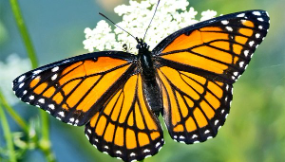

In [115]:
filename = 'image.png'
image = Image.open(filename)
image = image.convert('RGB')
image

Цель задания в том, чтобы реализовать функцию, которая бы по заданным входному изображению и матрицей размера 3x3, получала бы фильтрованное изображение, как на рисунке ниже:

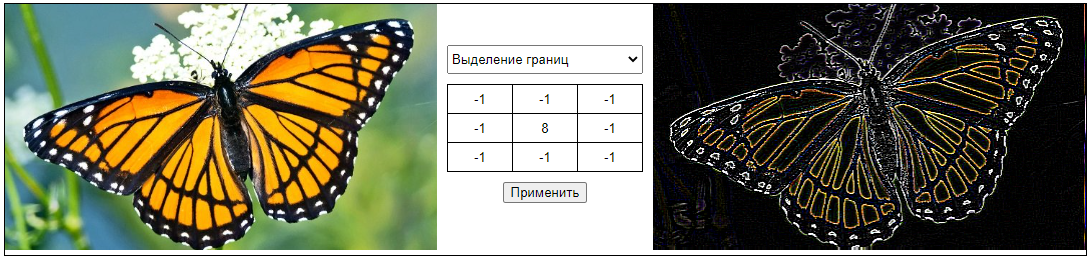

In [ ]:
filename = 'laplace filter.png'
filter_example = Image.open(filename)
filter_example = filter_example.convert('RGB')
filter_example

Для реализации фильтра необходимо использовать свёртку, которая осуществляется модулем 'torch.nn.Conv2d'. В созданном объекте необходимо заменить имеющиеся веса на заданные веса фильтра, как в примере ниже:

In [116]:
# conv_model = nn.Conv2d(in_channels=3, out_channels=1, kernel_size=3, 
#                        padding=2, stride=1, bias=False) # - конволюционный слой
# print('Исходные случайные веса в слое:')
# print(conv_model.weight)

In [117]:
# W = torch.tensor([[[0.,0,0],[0,1,0],[0,0,0]], 
#                   [[0.,0,0],[0,0,0],[0,0,0]],
#                   [[0.,0,0],[0,0,0],[0,0,0]]])

# with torch.no_grad():
#     conv_model.weight.copy_(W)

# print('Новые веса в слое:')
# print(conv_model.weight)

In [1]:
# new in one function
# типы фильтров
filters =\
{
'the_same' : [[0,0,0],[0,1,0],[0,0,0]],
'edge_x' : [[-1, -2, -1],[0, 0, 0],[1, 2, 1]],
'edge_y' : [[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]],
'edge' : [[-1,-1,-1],[-1,8,-1],[-1,-1,-1]],
'sharpness' : [[-1,-4,-1],[-4,26,-4],[-1,-4,-1]],
'blur' : [[1,1,1],[1,1,1],[1,1,1]],
'gauss_blur' : [[1,2,1],[2,4,2],[1,2,1]],
 'empty' : [[0,0,0],[0,0,0],[0,0,0]]
 }

def Conv_model_one(name = 'the_same', filters=filters):
    
    conv_model_one = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, 
                       padding=1, stride=1, bias=False) # - конволюционный слой
    
    W = torch.tensor(filters[name])
    
    with torch.no_grad():
        conv_model_one.weight.copy_(W)
        
    return conv_model_one

Также необходимо научиться использовать стандартные трансформации из модуля 'torchvision.transforms' для того, чтобы преобразовывать картинку из формата, возвращаемого библиотекой 'PIL.Image' в 'torch.Tensor':
- transforms.ToTensor()
- transforms.ToPILImage()

In [119]:
# new in one function

def transform_image(name, normal_type = 'linear'):
    
    filename = 'image.png'
    image = Image.open(filename)
    image = image.convert('RGB')

    t1 = transforms.ToTensor()
    tensor_image = t1(image)

    tensor_image = tensor_image.unsqueeze(dim=0)

      # разбиваем на каналы
    r_image = tensor_image[0][0].unsqueeze(dim=0)
    g_image = tensor_image[0][1].unsqueeze(dim=0)
    b_image = tensor_image[0][2].unsqueeze(dim=0)

    tensor_image_r = r_image.unsqueeze(dim=0)
    tensor_image_g = g_image.unsqueeze(dim=0)
    tensor_image_b = b_image.unsqueeze(dim=0)

    conv_model_one = Conv_model_one(name)
    result_r = conv_model_one(tensor_image_r)
    conv_model_one = Conv_model_one(name)
    result_g = conv_model_one(tensor_image_g)
    conv_model_one = Conv_model_one(name)
    result_b = conv_model_one(tensor_image_b)

    output_image = torch.cat((result_r.squeeze(dim=0), 
                              result_g.squeeze(dim=0),
                              result_b.squeeze(dim=0)), 0)
      # Нормируем изображение
    if normal_type == 'linear':
        # Линейное нормирование
        output_image = (output_image - output_image.min()) / (output_image.max() - output_image.min())  
    elif normal_type == 'statistic':
        # Нормирование по статистическим характеристикам
        output_image = torch.clamp((output_image - output_image.mean()) / (output_image.std()),0,1)
    
    result = output_image.squeeze(dim=0)

    t2 = transforms.ToPILImage()
    new_image = t2(result)
    return new_image

In [120]:
# t1 = transforms.ToTensor()
# tensor_image = t1(image)
# tensor_image.shape

In [121]:
# tensor_image = tensor_image.unsqueeze(dim=0)
# tensor_image.shape

In [122]:
# result = conv_model(tensor_image)

In [ ]:
#output_image = conv_model(tensor_image)
#result = (output_image - output_image.min()) / (output_image.max() - output_image.min())

In [123]:
# result = result.squeeze(dim=0)
# result.shape

In [124]:
# t2 = transforms.ToPILImage()
# new_image = t2(result)
# new_image

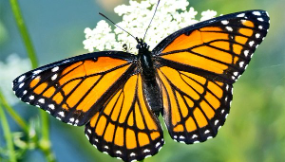

In [125]:
transform_image('the_same', 'linear')

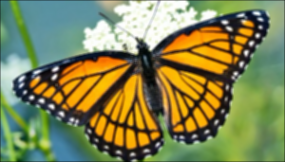

In [126]:
transform_image('blur', 'linear')

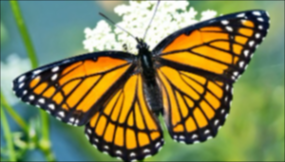

In [127]:
transform_image('gauss_blur', 'linear')

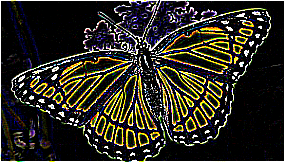

In [128]:
transform_image('edge', 'statistic')

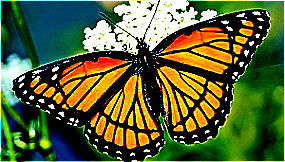

In [129]:
transform_image('sharpness', 'statistic')

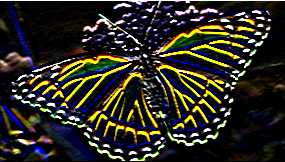

In [130]:
transform_image('edge_x', 'statistic')

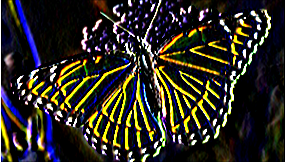

In [131]:
transform_image('edge_y', 'statistic')

В данном примере преобразования привели к чёрно-белой одно-канальной картинке. Ваша же задача состоит в том, чтобы картинка после применения фильтра оставалась цветной трёх-канальной, а фильтр применялся к каждому из каналов по-отдельности.

Более того, результат применения фильтров должен совпадать с теми, что показаны в статье (ссылка на статью в самом вверху).